In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving boston_housing_simulated_with_missing.csv to boston_housing_simulated_with_missing.csv


In [4]:
df_housing = pd.read_csv("boston_housing_simulated_with_missing.csv")

In [5]:
df_housing.fillna(df_housing.median(), inplace=True)

In [6]:
X = df_housing.drop(columns=['MEDV'])  # Features
y = df_housing['MEDV']  # Target (ราคาบ้าน)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize data for Neural Network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Train a highly optimized Neural Network (MLP Regressor) model
nn_model = MLPRegressor(
    hidden_layer_sizes=(512, 256, 128, 64), activation='relu', solver='adam',
    alpha=0.0001, learning_rate='adaptive', max_iter=3000, random_state=42,
    early_stopping=True, validation_fraction=0.1, batch_size=32
)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

In [10]:
# Evaluate Neural Network model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

In [11]:
# Print results
print("Optimized Neural Network Performance:")
print(f"  MAE: {mae_nn:.2f}, MSE: {mse_nn:.2f}, RMSE: {rmse_nn:.2f}, R²: {r2_nn:.2f}")

Optimized Neural Network Performance:
  MAE: 10.99, MSE: 175.95, RMSE: 13.26, R²: -0.09


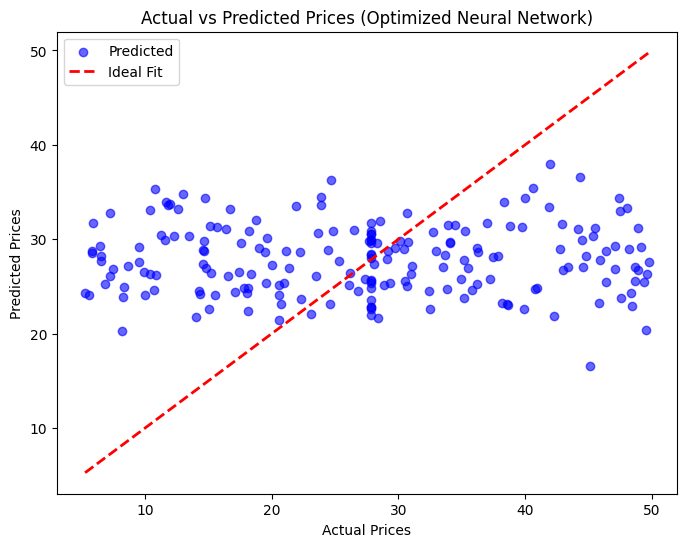

In [12]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Optimized Neural Network)")
plt.legend()
plt.show()

In [14]:
# Function for user input prediction
def predict_house_price(input_features):
    input_array = np.array(input_features).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    predicted_price = nn_model.predict(input_scaled)[0]
    return predicted_price

# Example usage
example_input = [7.319939418114051, 87.29458358764083, 27.1876374156311, 0, 0.7986189499518013, 4.729107155757177, 23.285855687609423, 6.218984978289756, 2, 348, 13.128581649436972, 374.5387789884333, 26.968125219404996]
print(f"Predicted House Price: {predict_house_price(example_input):.2f}")

Predicted House Price: 30.05


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
import pickle

# ตรวจสอบว่าโมเดล nn_model มีอยู่ใน memory ก่อนบันทึก
if 'nn_model' in locals():
    try:
        pickle.dump(nn_model, open("nn_model.pkl", "wb"))
        print("✅ บันทึกโมเดล Neural Network สำเร็จ!")
    except Exception as e:
        print(f"❌ เกิดข้อผิดพลาดขณะบันทึกโมเดล: {e}")
else:
    print("⚠️ ไม่พบโมเดล nn_model โปรดตรวจสอบว่าโมเดลถูกสร้างแล้ว")


✅ บันทึกโมเดล Neural Network สำเร็จ!
